# ImageJ in Python

This notebook shows how to use ImageJ as a Python library and uses the OMERO Python API to connect to an OMERO server.

We load a Zarr image from a public S3 repository

In this setup, Fiji has already been installed. 
We will use the [pyimagej](https://pypi.org/project/pyimagej/) library to access to the entire ImageJ API from Python.

## Install dependencies

In [1]:
%conda install dask zarr

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Packages

In [2]:
import numpy
import dask.array as da
import zarr
from dask.diagnostics import ProgressBar

import imagej

## Starting ImageJ from Python

In [3]:
ij = imagej.init('/srv/conda/vnc/Fiji.app')
ij.getVersion()

'2.0.0-rc-69/1.52p'

In [4]:
image_id = 6001240

In [5]:
def load_binary_from_s3(id, resolution='0'):
    endpoint_url = 'https://s3.embassy.ebi.ac.uk/'
    root = 'idr/zarr/v0.1/%s.zarr/%s/' % (id, resolution)
    data = da.from_zarr(endpoint_url + root)
    with ProgressBar():
        return numpy.asarray(da.from_zarr(endpoint_url + root))

img = load_binary_from_s3(image_id)
print(img.shape)

[########################################] | 100% Completed | 26.1s
(1, 2, 236, 275, 271)


## Display image using `ij.py.show()`

(1, 2, 275, 271)


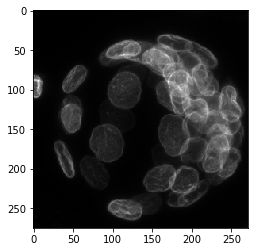

In [6]:
img_new = numpy.mean(img, axis=2)
print(img_new.shape)
ij.py.show(img_new[0, 0, :, :], cmap = 'gray')

## Process numpy arrays in ImageJ

We use the method `to_java()` to convert into ImageJ types.

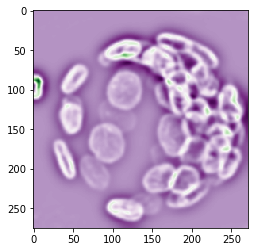

In [8]:
img = img_new[0, 0, :, :]
result = numpy.zeros(img.shape)
sigma1 = 8
sigma2 = 2
# note the use of to_java on img and result to turn the numpy images into RAIs
ij.op().filter().dog(
    ij.py.to_java(result),
    ij.py.to_java(img),
    sigma1,
    sigma2)
# purple highlights the edges of the vessels, green highlights the centers
ij.py.show(result, cmap = 'PRGn')